In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

In [2]:
G = 6.67*10**(-11)
mT = 5.9736*10**(24)
rT = 6.3781*10**(6)
mL = 0.07349*10**(24)
rL = 1.7374*10**(6)
d = 3.844*10**(8)
w = 2.6617*10**(-6)

In [3]:
def System(x, t):
    r, phi, pr, pphi = x

    delta = G*mT/(d**3)
    mu = mL/mT
    rp = np.sqrt(1 + r**2 - 2*r*np.cos(phi - w*t))

    drdt = pr
    dphidt = pphi/(r**2)
    dprdt = (pphi**2)/(r**3) - delta*((1/(r**2)) + (mu/(rp**3))*(r - np.cos(phi - w*t)))
    dpphidt = -(delta*mu*r)*np.sin(phi - w*t)/(rp**3)

    return np.array([drdt, dphidt, dprdt, dpphidt])

In [4]:
def RK4 (f, x0, t):
    h = t[1] - t[0]

    r = np.zeros_like(t)
    phi = np.zeros_like(t)
    pr = np.zeros_like(t)
    pphi = np.zeros_like(t)
    
    r[0] = x0[0]
    phi[0] = x0[1]
    pr[0] = x0[2]
    pphi[0] = x0[3]

    K1 = np.zeros(4)
    K2 = np.zeros(4)
    K3 = np.zeros(4)
    K4 = np.zeros(4)


    for i in tqdm(range(1, len(t)), desc='Running simulation', unit=' Steps' ):
        
        K1 = f([r[i-1], phi[i-1], pr[i-1], pphi[i-1]], t[i-1])
        K2 = f([r[i-1]+0.5*h*K1[0], phi[i-1]+0.5*h*K1[1], pr[i-1]+0.5*h*K1[2], pphi[i-1]+0.5*h*K1[3]], t[i-1]+0.5*h)
        K3 = f([r[i-1]+0.5*h*K2[0], phi[i-1]+0.5*h*K2[1], pr[i-1]+0.5*h*K2[2], pphi[i-1]+0.5*h*K2[3]], t[i-1]+0.5*h)
        K4 = f([r[i-1]+h*K3[0], phi[i-1]+h*K3[1], pr[i-1]+h*K3[2], pphi[i-1]+h*K3[3]], t[i-1]+h)

        r[i] = r[i-1] + (h/6)*(K1[0] + 2*K2[0] + 2*K3[0] + K4[0])
        phi[i] = phi[i-1] + (h/6)*(K1[1] + 2*K2[1] + 2*K3[1] + K4[1])
        pr[i] = pr[i-1] + (h/6)*(K1[2] + 2*K2[2] + 2*K3[2] + K4[2])
        pphi[i] = pphi[i-1] + (h/6)*(K1[3] + 2*K2[3] + 2*K3[3] + K4[3])

    return np.array([r, phi, pr, pphi])

In [41]:
r0 = rT
phi = np.deg2rad(25)

v0 = 11179
theta = np.deg2rad(26.225)

v0n = v0/d

r0n = r0/d
pr0n = v0n*np.cos(theta - phi)
pphi0n = r0n*v0n*np.sin(theta - phi)



x0 = np.array([r0n, phi, pr0n, pphi0n])

t0 = 0
tmax = float(60*60*24*2.5)
h = 1

t = np.arange(t0, tmax, h)



In [42]:
x = RK4(System, x0, t)

Running simulation: 100%|███████████████████████████████████████████████| 215999/215999 [00:19<00:00, 10865.41 Steps/s]


<IPython.core.display.Javascript object>


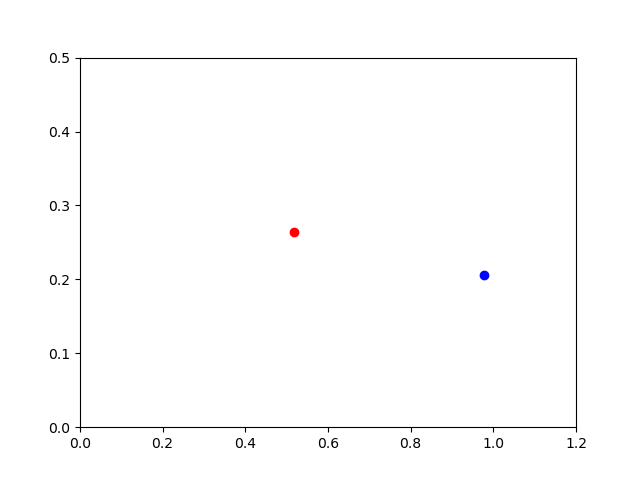

In [43]:
r = x[0]
phi = x[1]

x1 = r[0]*np.cos(phi[0])
y1 = r[0]*np.sin(phi[0])
x2 = np.cos(w*t[0])
y2 = np.sin(w*t[0])

def update1(i):
    x1 = r*np.cos(phi)
    y1 = r*np.sin(phi)
    return x1, y1

def update2(i):
    x2 = np.cos(w*t[i])
    y2 = np.sin(w*t[i])
    return x2, y2


fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlim(0,1.2)
ax.set_ylim(0,0.5)

scatter1 = ax.scatter(x1, y1, color='red')
scatter2 = ax.scatter(x2, y2, color='blue')

scale = 1000
t1 = t[::scale]


def update(i):
    
    x1 = r[::scale][i]*np.cos(phi[::scale][i])
    y1 = r[::scale][i]*np.sin(phi[::scale][i])
    x2 = np.cos(w*t[::scale][i])
    y2 = np.sin(w*t[::scale][i])
    
    scatter1.set_offsets([[x1, y1]])
    scatter2.set_offsets([[x2, y2]])
    return scatter1, scatter2




anim.FuncAnimation(fig, update, frames=len(t1), interval=100, blit=True)






El punto azul es la luna, el naraja es la nave.